In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sklearn as sk
import math
import copy
import seaborn as sns
from datetime import date


print("Pandas: ", pd.__version__)
print("Numpy: ", np.__version__)
print("Sklearn: ", sk.__version__)

Pandas:  1.4.4
Numpy:  1.21.5
Sklearn:  1.0.2


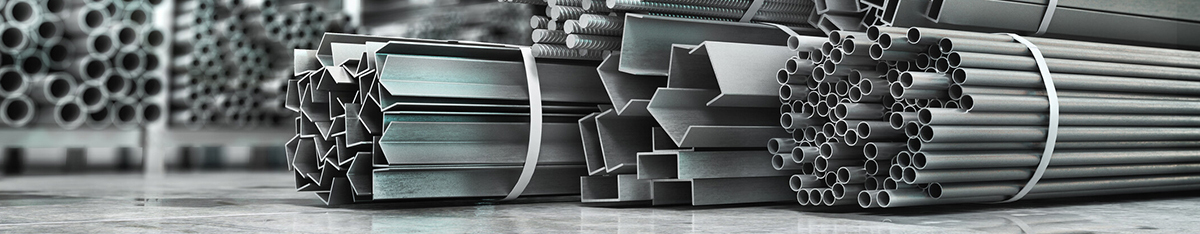

# Understanding steel selling price for custumers, and making predictive models
- We have a dataset with steel prices along with some other features. We try to analyze the data, try to see the trends and also make predictive models to predict future prices of steel
- 14 attribure have been recorded, looking at them my initial guess would be `quantity tons`, `thickness`, `width` may play an important role in determining price (There might be other variables too)

# Attributes recorded in the dataset:

## Numerical
- **item_date**: 
- **customer**: Customer sold to
- **country**: Country of transaction
- **application**: Application of the steel
- **width**: Width of steel sold
- **thickness**: Thickness of steel sold
- **product_ref**: 
- **delivery date**: Date of delivery
- **selling_price**: Selling price (Target variable)

## Categorical
- **id**: ID of the item sold
- **quantity tons**: quantity of the item sold
- **status**: 
- **item type**:
- **material_ref**:

In [2]:
df= pd.read_excel("daily_offers.xlsx")
df.head(10)

id   item_date quantity tons    customer  \
0  EC06F063-9DF0-440C-8764-0B0C05A4F6AE  20210401.0     54.151139  30156308.0   
1  4E5F4B3D-DDDF-499D-AFDE-A3227EC49425  20210401.0    768.024839  30202938.0   
2  E140FF1B-2407-4C02-A0DD-780A093B1158  20210401.0    386.127949  30153963.0   
3  F8D507A0-9C62-4EFE-831E-33E1DA53BB50  20210401.0    202.411065  30349574.0   
4  4E1C4E78-152B-430A-8094-ADD889C9D0AD  20210401.0    785.526262  30211560.0   
5  FE372230-29B1-4A29-BB73-CB9D3078C286  20210401.0    225.790676  30202938.0   
6  E1B47219-42C8-411D-AE46-AD5256DC4757  20210401.0      3.522613  30209509.0   
7  AA3F18A2-A7D6-43DE-8644-F0632AE2CB68  20210401.0    113.387124  30342192.0   
8  2851F48B-DA32-4DF3-884B-17A3100DD65A  20210401.0     69.071853  30341428.0   
9  6E4D638C-A820-4A40-836F-C9D48BC65528  20210401.0    630.626917  30202938.0   

   country status item type  application  thickness   width  \
0     28.0    Won         W         10.0       2.00  1500.0   
1     25.0    Won         W         41.0       0.80  1210.0   
2     30.0    Won        WI         28.0       0.38   952.0   
3     32.0    Won         S         59.0       2.30  1317.0   
4     28.0    Won         W         10.0       4.00  2000.0   
5     25.0    Won         W         41.0       1.50  1265.0   
6     30.0  Draft         W         41.0       0.38  1125.0   
7     32.0    Won         W         41.0       0.68  1220.0   
8     38.0    Won         S         10.0       0.60  1275.0   
9     25.0    Won         W         41.0       1.50  1165.0   

                               material_ref  product_ref  delivery date  \
0                               DEQ1 S460MC   1670798778     20210701.0   
1  0000000000000000000000000000000000104991   1668701718     20210401.0   
2                                  S0380700       628377     20210101.0   
3                   DX51D+ZM310MAO 2.3X1317   1668701718     20210101.0   
4                           2_S275JR+AR-CL1       640665     20210301.0   
5  0000000000000000000000000000000000102325   1668701718     20210401.0   
6                         NBW_L+_A_1125_0.4       611993     20210701.0   
7  0000000000000000000000000000000001000944       611993     20210101.0   
8  0000000000000000000000000000000000106786   1668701376     20210701.0   
9  0000000000000000000000000000000000102325   1668701718     20210401.0   

   selling_price  
0         854.00  
1        1047.00  
2         644.33  
3         768.00  
4         577.00  
5         983.00  
6          18.00  
7         931.00  
8        1363.00  
9         983.00

In [3]:
print(f"Data shape: {df.shape}")

Data shape: (181673, 14)


In [4]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [6]:
df.nunique()

id               181671
item_date           252
quantity tons    181673
customer           1169
country              17
status                9
item type             7
application          30
thickness           594
width              1386
material_ref      16563
product_ref          33
delivery date        28
selling_price      9795
dtype: int64

In [7]:
df['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable', nan], dtype=object)

# Data Cleaning

### `quantity tons` should be a numerical variable, but it is stores as object type. We need to convert it into numerical

In [8]:
df['quantity tons'].dtype

dtype('O')

In [9]:
df['quantity tons']= pd.to_numeric(df['quantity tons'], errors='coerce')

In [10]:
df['quantity tons']= abs(df['quantity tons'])

In [11]:
df['quantity tons']

0           54.151139
1          768.024839
2          386.127949
3          202.411065
4          785.526262
             ...     
181668     102.482422
181669     208.086469
181670       4.235594
181671    2000.000000
181672     406.686538
Name: quantity tons, Length: 181673, dtype: float64

In [12]:
cat_columns= ['id','quantity tons','status','item type','material_ref']

In [13]:
for col in cat_columns:
    print(f"{col}:\n {df[col].unique()}\n")

id:
 ['EC06F063-9DF0-440C-8764-0B0C05A4F6AE'
 '4E5F4B3D-DDDF-499D-AFDE-A3227EC49425'
 'E140FF1B-2407-4C02-A0DD-780A093B1158' ...
 '91643238-5C7B-4237-9A5F-63AE3D35F320'
 '7AFFD323-01D9-4E15-B80D-7D1B03498FC8'
 'AD0CA853-AE3C-4B2F-9FBB-8B0B965F84BC']

quantity tons:
 [  54.15113862  768.0248392   386.12794891 ...    4.23559357 2000.
  406.68653838]

status:
 ['Won' 'Draft' 'To be approved' 'Lost' 'Not lost for AM' 'Wonderful'
 'Revised' 'Offered' 'Offerable' nan]

item type:
 ['W' 'WI' 'S' 'Others' 'PL' 'IPL' 'SLAWR']

material_ref:
 ['DEQ1 S460MC' '0000000000000000000000000000000000104991' 'S0380700' ...
 'MAS65550' '4.11043_1060X5_BRE' '202006170005.IO.1.1']



In [14]:
df.isna().sum()

id                   2
item_date            1
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

[1.10087905e-05 5.50439526e-06 5.50439526e-06 5.50439526e-06
 1.54123067e-04 1.10087905e-05 0.00000000e+00 1.32105486e-04
 5.50439526e-06 0.00000000e+00 4.28896974e-01 0.00000000e+00
 5.50439526e-06 5.50439526e-06]


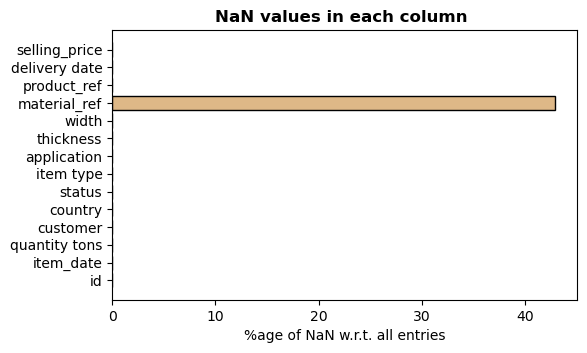

In [15]:
null_colms= []
for i in df.isna().sum():
    null_colms.append(float(i))
    
plt.figure(figsize= (6,3.5))
plt.barh(df.columns, np.array(null_colms)/len(df)*100, color= 'burlywood', edgecolor= 'k')
plt.title("NaN values in each column ", weight= 'bold')
plt.xlabel("%age of NaN w.r.t. all entries")
print(np.array(null_colms)/len(df))

In [16]:
df['material_ref']=df['material_ref'].replace(to_replace=np.nan,value="None")
df['material_ref'].isna().sum()

0

In [17]:
df.isna().sum()

id                2
item_date         1
quantity tons     1
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
material_ref      0
product_ref       0
delivery date     1
selling_price     1
dtype: int64

In [18]:
df=df.dropna()
df.shape

(181635, 14)

In [19]:
df.isna().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

## Observations:
- `material_ref` columns has the most number of Null values, more than $40\%$ of the data is Null.
- Since it is a categorical variable we replace the Null value with a new category named 'none'
- All the other null data contribute to a very small fraction of the data ($<1\%$) thus we just delete it.

# -------------------------------------------------------------------------------------------

# Exploratory Data Analysis

In [20]:
df.describe().T

count          mean           std           min  \
item_date      181635.0  2.020459e+07  4.551295e+03  1.995000e+07   
quantity tons  181635.0  5.876125e+03  2.349320e+06  1.000000e-05   
customer       181635.0  3.023251e+07  1.005621e+05  1.245800e+04   
country        181635.0  4.489309e+01  2.440426e+01  2.500000e+01   
application    181635.0  2.561610e+01  1.775408e+01  2.000000e+00   
thickness      181635.0  2.564171e+00  6.572569e+00  1.800000e-01   
width          181635.0  1.295268e+03  2.616417e+02  1.000000e+00   
product_ref    181635.0  4.740394e+08  7.175422e+08  6.117280e+05   
delivery date  181635.0  2.020738e+07  2.411300e+04  2.019040e+07   
selling_price  181635.0  1.918346e+03  3.318294e+05 -1.160000e+03   

                        25%           50%           75%           max  
item_date      2.020093e+07  2.020113e+07  2.021020e+07  2.021040e+07  
quantity tons  1.096885e+01  3.036408e+01  6.716436e+01  1.000000e+09  
customer       3.019688e+07  3.020524e+07  3.028042e+07  3.040818e+07  
country        2.600000e+01  3.000000e+01  7.800000e+01  1.130000e+02  
application    1.000000e+01  1.500000e+01  4.100000e+01  9.900000e+01  
thickness      7.000000e-01  1.500000e+00  3.000000e+00  2.500000e+03  
width          1.180000e+03  1.250000e+03  1.500000e+03  2.990000e+03  
product_ref    6.119930e+05  6.406650e+05  1.332077e+09  1.722208e+09  
delivery date  2.020110e+07  2.021010e+07  2.021040e+07  3.031010e+07  
selling_price  6.690000e+02  8.120000e+02  9.530000e+02  1.000010e+08

In [21]:
# Just storing the month for item date values
df['item_month']=((df['item_date']/10000-(df['item_date']/10000).apply(np.floor))*100).apply(np.floor)

In [22]:
# Just storing the month for item delivery date values
df['delivery_month']=((df['delivery date']/10000-(df['delivery date']/10000).apply(np.floor))*100).apply(np.floor)

In [23]:
print(df['item_month'].unique())
print(df['delivery_month'].unique())

[ 4.  0.  3.  2.  1. 12. 11. 19. 10.  9.  8.  7.]
[ 7.  4.  1.  3.  6.  5.  8.  9. 10. 11.  2. 12. 22.]


In [24]:
df=df.drop(['item_date','delivery date'], axis=1)
df.columns

Index(['id', 'quantity tons', 'customer', 'country', 'status', 'item type',
       'application', 'thickness', 'width', 'material_ref', 'product_ref',
       'selling_price', 'item_month', 'delivery_month'],
      dtype='object')

In [25]:
# There is no duplicate data
df.duplicated().sum()

0

## Observations:
- We have seen the time series data for columns `item_date` and `delivery date` are stoed as numerical values.
- We only keep focus on the month part discarding the year and day part of information

## Histogram plots of numerical variables

In [26]:
num_columns=['customer','country','application','width','thickness','product_ref','selling_price','item_month','delivery_month','quantity tons']
cat_columns=['status','material_ref','item type']


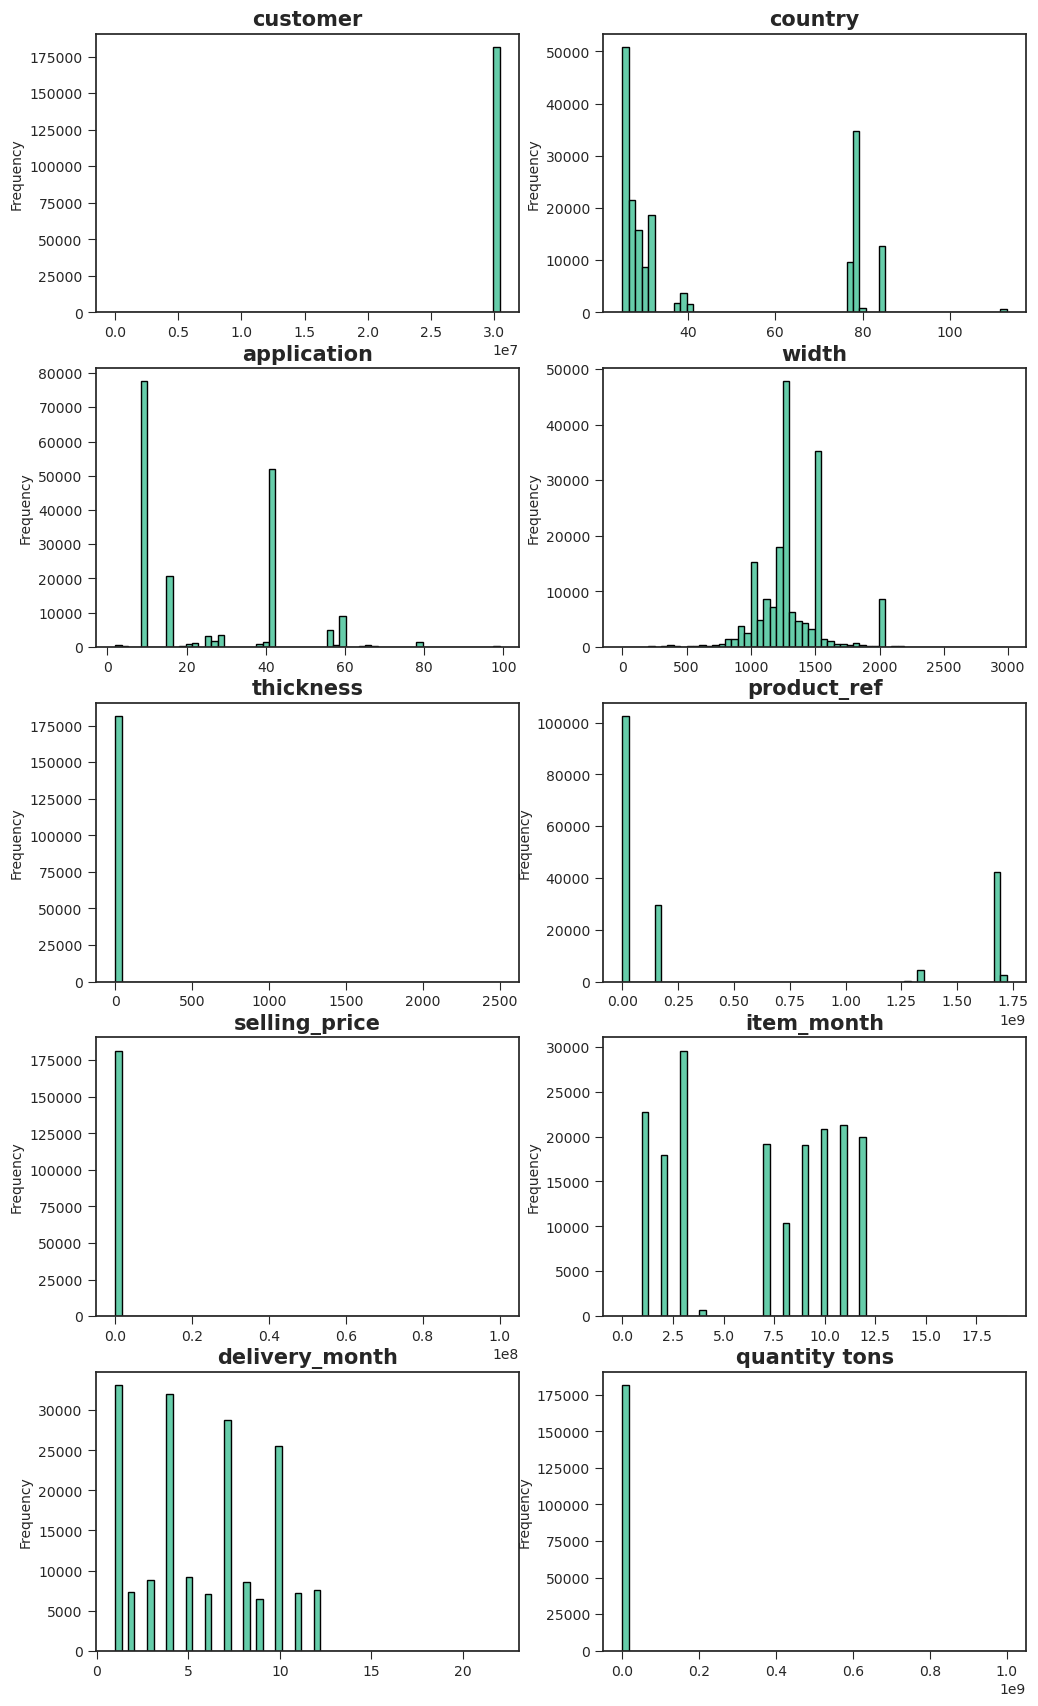

In [27]:
with plt.style.context(('seaborn-ticks')):
    fig, ax = plt.subplots(5,2, figsize= (12,21))
    for i in range(int(len(num_columns)/2)):
        col=num_columns[2*i]
        ax[i][0].hist(df[col],edgecolor= 'k', bins= 60, color= 'mediumaquamarine')
        ax[i][0].set_title(f"{col}", weight= 'bold',size=15)
        ax[i][0].set_ylabel("Frequency")
        
        col=num_columns[2*i+1]
        ax[i][1].hist(df[col],edgecolor= 'k', bins= 60, color= 'mediumaquamarine')
        ax[i][1].set_title(f"{col}", weight= 'bold',size=15)
        ax[i][1].set_ylabel("Frequency")

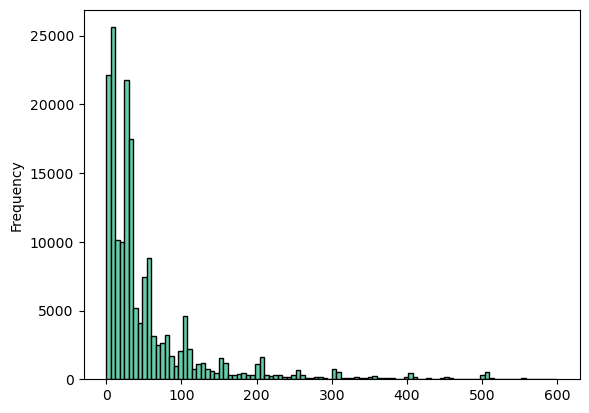

In [28]:
ax = df.loc[df['quantity tons']<600]['quantity tons'].plot.hist(bins=100, alpha=1, edgecolor='k',color='mediumaquamarine')


In [29]:
(df.shape[0]-df.loc[df['quantity tons']<600].shape[0])/df.shape[0]

0.024472155696864593

In [30]:
df.loc[df['quantity tons']<600].shape

(177190, 14)

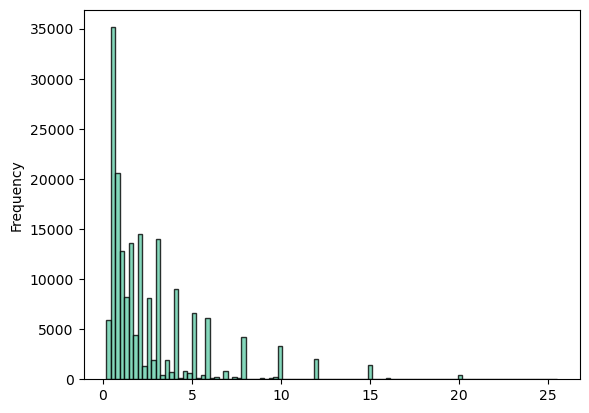

In [31]:
ax = df.loc[df['thickness']<100]['thickness'].plot.hist(bins=100, alpha=0.8, edgecolor='k',color='mediumaquamarine')


In [32]:
(df.shape[0]-df.loc[df['thickness']<100].shape[0])/df.shape[0]

1.1011093676879456e-05

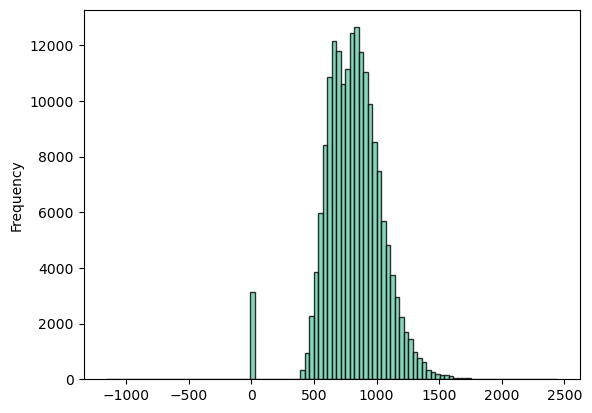

In [33]:
ax = df.loc[df['selling_price']<3000]['selling_price'].plot.hist(bins=100, alpha=0.8, edgecolor='k',color='mediumaquamarine')


In [34]:
(df.shape[0]-df.loc[df['selling_price']<3000].shape[0])/df.shape[0]

5.505546838439728e-05

In [35]:
df['quantity tons']= df.loc[df['quantity tons']<600]['quantity tons']
df['selling_price']= df.loc[df['selling_price']<3000]['selling_price']
df['thickness']= df.loc[df['thickness']<100]['thickness']

# Observations:
- Althogh all of these columns are stores as numerical values, some are categorical where each category is represented by a number. These are `country`, `product_ref`, `application` and `customer`. 
- The output variable `selling_price` looks distributed like a slightly skewed gaussian. With mean $\mu=820$, and standard deviation $\sigma=225$
- There is a unexpected peak of sales made at a very low value ($<30$) as can be seen from the histogram.
- From the histogram of `thickness` the first thing we observe is the peak of the distribution occurs at about $0.2-0.4$ and it is highly skewed towards the left.
- Another very interesting observation from the `thickness` plot is there are sudden peak in frequencies for certain thickness values. I belive it is an indication that there are some standard thickness of steel, where the steel are mostly manufactured. Those vales of thickness might have some particular use cases.
- The `quantity tons` histogram follows a exponential like distribtion with mean $\mu=60$ tons and standard deviation $\sigma=80$.
- Looking at `delivery_month` column histogram we can observe that there is a peak in delivery every quarter of the year. So most of the deliveries are being made on January, April, July or October.

## Plotting bar graphs for categorical variables 

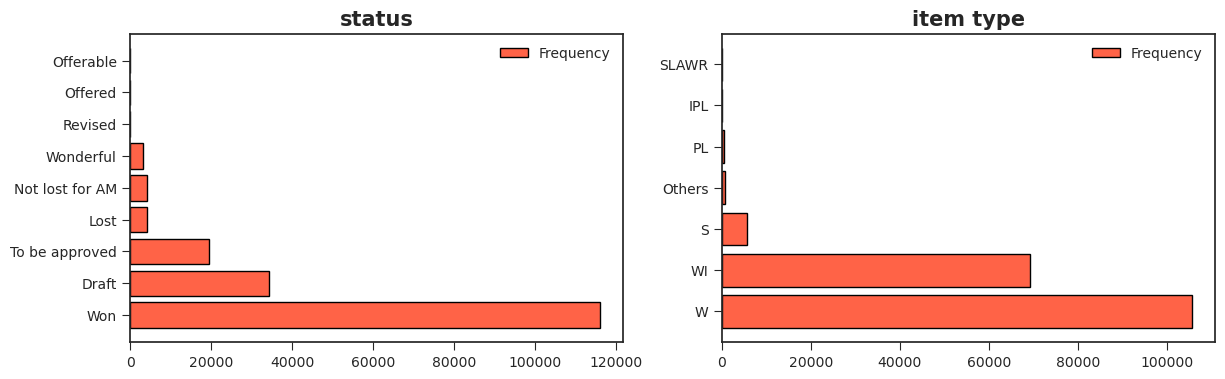

In [36]:
barplot_cat=['status','item type']
with plt.style.context(('seaborn-ticks')):
    fig, ax = plt.subplots(1,2, figsize= (14,4))
    for i in range(int(len(barplot_cat)/2)):
        colm=barplot_cat[2*i]
        ax[0].barh(df[colm].unique(),df[colm].value_counts(), edgecolor='k', label='Frequency', color= 'tomato')
        ax[0].set_title(f"{colm}", weight= 'bold',size=15)
        ax[0].legend()
        
        colm=barplot_cat[2*i+1]
        ax[1].barh(df[colm].unique(),df[colm].value_counts(), edgecolor='k', label='Frequency', color= 'tomato')
        ax[1].set_title(f"{colm}", weight= 'bold',size=15)
        ax[1].legend()
        

# Observations:
- I don't know in detail what the entries of the columns `status` and `item type` mean.
- I belive `staus` indicates the status of the tender that is placed for the steel. Vast majority of the orders have been won ~$65\%$ as seen from the bar graph.

## From this plot we try to visulaize the correlation between the numerical variables.

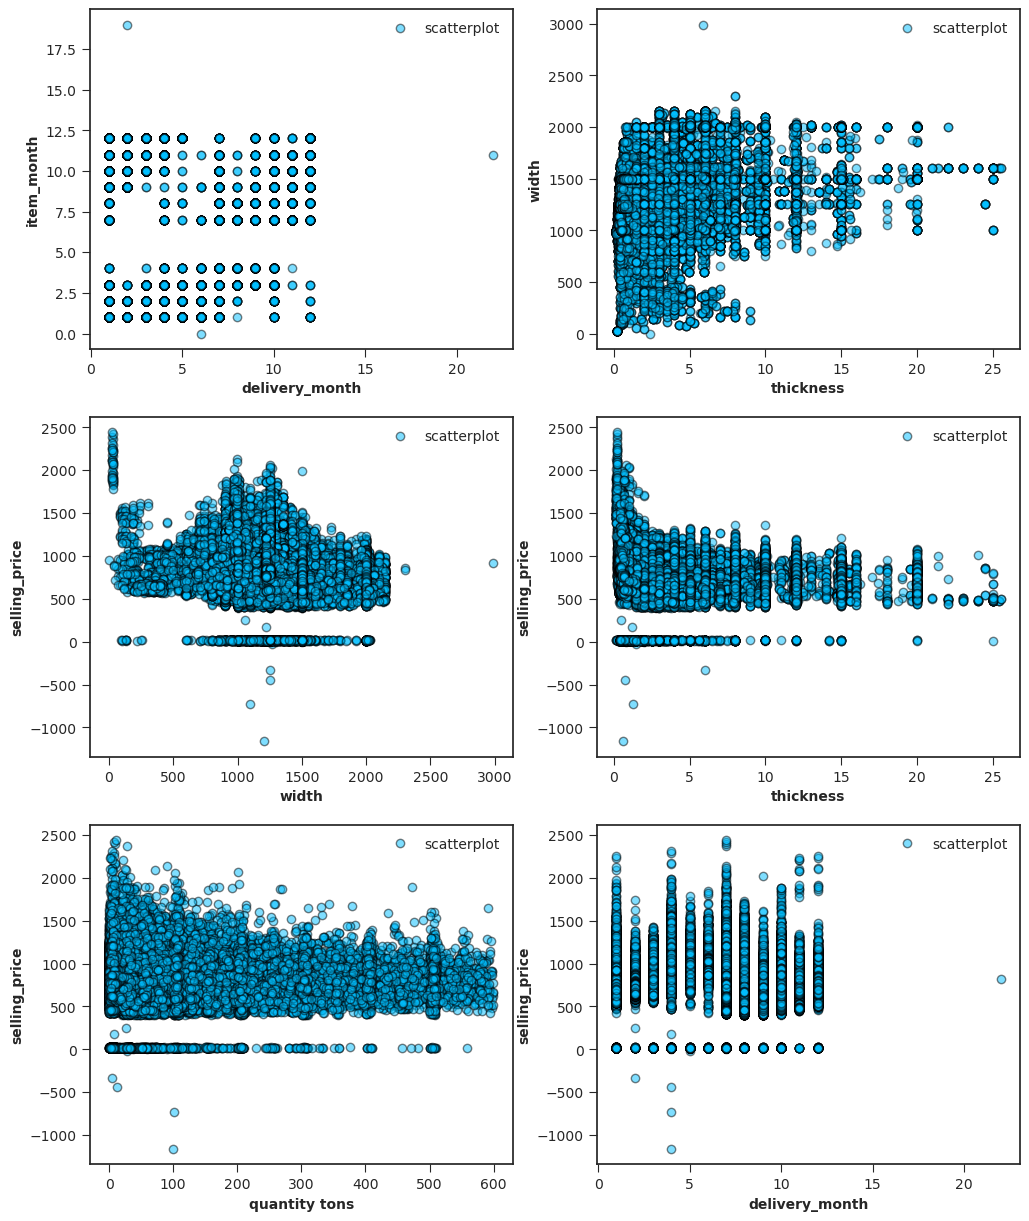

In [37]:
with plt.style.context(('seaborn-ticks')):
    fig, ax = plt.subplots(3,2, figsize= (12,15))
    ax[0][0].plot(df[num_columns[8]],df[num_columns[7]],marker='o',color='deepskyblue',linestyle='none', alpha=0.5,markeredgecolor='k', label='scatterplot')
    ax[0][0].set_xlabel(num_columns[8],weight='bold')
    ax[0][0].set_ylabel(num_columns[7],weight='bold')
    ax[0][0].legend()
    
    ax[0][1].plot(df[num_columns[4]],df[num_columns[3]],marker='o',color='deepskyblue',linestyle='none', alpha=0.5,markeredgecolor='k', label='scatterplot')
    ax[0][1].set_xlabel(num_columns[4],weight='bold')
    ax[0][1].set_ylabel(num_columns[3],weight='bold')
    ax[0][1].legend()
    
    
    ax[1][0].plot(df[num_columns[3]],df[num_columns[6]],marker='o',color='deepskyblue',linestyle='none', alpha=0.5,markeredgecolor='k', label='scatterplot')
    ax[1][0].set_xlabel(num_columns[3],weight='bold')
    ax[1][0].set_ylabel(num_columns[6],weight='bold')
    ax[1][0].legend()
    
    ax[1][1].plot(df[num_columns[4]],df[num_columns[6]],marker='o',color='deepskyblue',linestyle='none', alpha=0.5,markeredgecolor='k', label='scatterplot')
    ax[1][1].set_xlabel(num_columns[4],weight='bold')
    ax[1][1].set_ylabel(num_columns[6],weight='bold')
    ax[1][1].legend()
    
    
    ax[2][0].plot(df[num_columns[9]],df[num_columns[6]],marker='o',color='deepskyblue',linestyle='none', alpha=0.5,markeredgecolor='k', label='scatterplot')
    ax[2][0].set_xlabel(num_columns[9],weight='bold')
    ax[2][0].set_ylabel(num_columns[6],weight='bold')
    ax[2][0].legend()
    
    ax[2][1].plot(df[num_columns[8]],df[num_columns[6]],marker='o',color='deepskyblue',linestyle='none', alpha=0.5,markeredgecolor='k', label='scatterplot')
    ax[2][1].set_xlabel(num_columns[8],weight='bold')
    ax[2][1].set_ylabel(num_columns[6],weight='bold')
    ax[2][1].legend()
    
    
    

In [38]:
num_columns

['customer',
 'country',
 'application',
 'width',
 'thickness',
 'product_ref',
 'selling_price',
 'item_month',
 'delivery_month',
 'quantity tons']

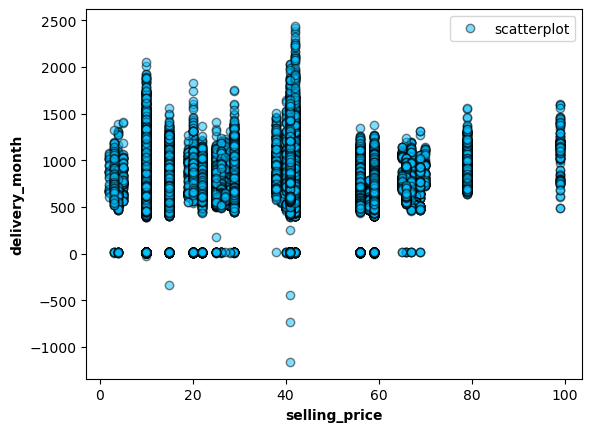

In [39]:
plt.plot(df['application'],df[num_columns[6]],marker='o',color='deepskyblue',linestyle='none', alpha=0.5,markeredgecolor='k', label='scatterplot')
plt.xlabel(num_columns[6],weight='bold')
plt.ylabel(num_columns[8],weight='bold')
plt.legend()

Text(0.5, 1.0, 'Correlation Plot')

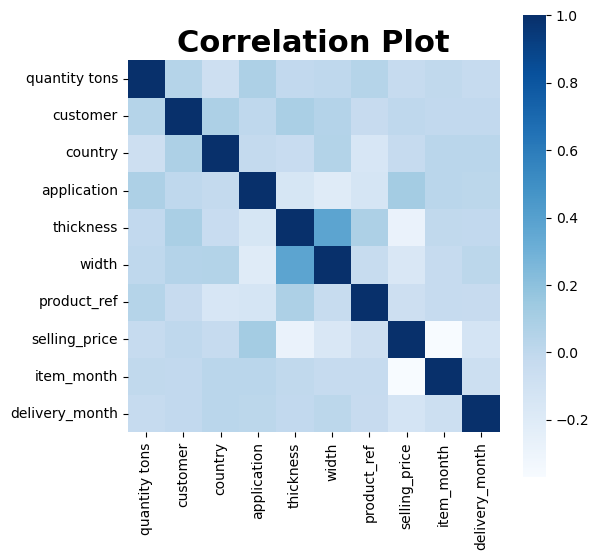

In [40]:
corr= df.corr()
f, ax = plt.subplots(figsize=(6, 6))
cmap= sns.color_palette("Blues", as_cmap=True)
sns.heatmap(corr, square=True, cmap=cmap, vmax=1)
plt.title("Correlation Plot", weight= 'bold', size= 22)

In [41]:
corr.T

quantity tons  customer   country  application  thickness  \
quantity tons        1.000000  0.042264 -0.074833     0.082149  -0.006947   
customer             0.042264  1.000000  0.083568     0.000900   0.091799   
country             -0.074833  0.083568  1.000000    -0.019358  -0.042803   
application          0.082149  0.000900 -0.019358     1.000000  -0.142059   
thickness           -0.006947  0.091799 -0.042803    -0.142059   1.000000   
width                0.000282  0.050528  0.055286    -0.204446   0.375916   
product_ref          0.043516 -0.032340 -0.147388    -0.131832   0.079304   
selling_price       -0.026188 -0.000085 -0.023850     0.117272  -0.278193   
item_month          -0.006673 -0.007429  0.022811     0.020186  -0.004799   
delivery_month      -0.026862 -0.012061  0.022659     0.018252  -0.009521   

                   width  product_ref  selling_price  item_month  \
quantity tons   0.000282     0.043516      -0.026188   -0.006673   
customer        0.050528    -0.032340      -0.000085   -0.007429   
country         0.055286    -0.147388      -0.023850    0.022811   
application    -0.204446    -0.131832       0.117272    0.020186   
thickness       0.375916     0.079304      -0.278193   -0.004799   
width           1.000000    -0.034418      -0.161585   -0.025581   
product_ref    -0.034418     1.000000      -0.071139   -0.025150   
selling_price  -0.161585    -0.071139       1.000000   -0.370894   
item_month     -0.025581    -0.025150      -0.370894    1.000000   
delivery_month  0.015141    -0.030269      -0.126111   -0.070818   

                delivery_month  
quantity tons        -0.026862  
customer             -0.012061  
country               0.022659  
application           0.018252  
thickness            -0.009521  
width                 0.015141  
product_ref          -0.030269  
selling_price        -0.126111  
item_month           -0.070818  
delivery_month        1.000000

## Observations:
- None of the variables seem to have a clear correlation between them, as can be seen from the graph AND the correlation plot
- `item_month` and `delivery_month` doesn't have any correlation between them
- Although none of them have any clear dependence, still there are subtle dependencies we can gather from the graphs
- The likelihood for a steel sheet to have thickness $>5$ is $12\%$, but for steel with width $<500$, the likelihod for it to be $>5$ is $0.07\%$
- The likelihood for a steel sheet to have thickness $>2$ is $37\%$. But for steel with selling price $>1200$, the likelihood for it to have thickness $>2$ is only $0.6\%$
- Month of delivery doesn't have any effect on the selling price

In [42]:
df.groupby(by=["material_ref"]).mean()['selling_price']

material_ref
-                                            867.303030
.                                            703.000000
0,35X1050                                   1162.000000
0,37X1260                                   1122.666667
0,3X935 DC01 NET GENT                        834.000000
                                               ...     
zapytanie RK                                 949.000000
zapytanie TL                                1069.533333
zapytanie ofertowe 013-10-2018-US-Serwi      819.200000
zapytanie ofertowe 043-05-2019-US-Serwis     574.333333
zapytannie TH                                957.090909
Name: selling_price, Length: 16564, dtype: float64

In [43]:
df.groupby(by=["material_ref"]).std()['selling_price']

material_ref
-                                            79.593296
.                                                  NaN
0,35X1050                                   147.078210
0,37X1260                                   121.541488
0,3X935 DC01 NET GENT                              NaN
                                               ...    
zapytanie RK                                106.186157
zapytanie TL                                 99.603404
zapytanie ofertowe 013-10-2018-US-Serwi     135.814948
zapytanie ofertowe 043-05-2019-US-Serwis      5.507571
zapytannie TH                                92.744223
Name: selling_price, Length: 16564, dtype: float64

In [44]:
df['selling_price'].mean()

816.4891240743327

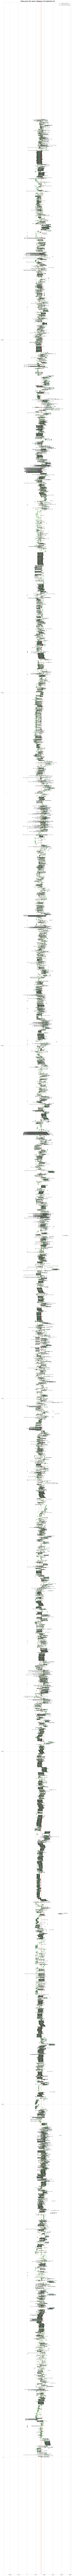

In [45]:
with plt.style.context(('seaborn-whitegrid')):
    plt.figure(figsize=(13,500))
    plt.errorbar(df.groupby(by=["material_ref"]).mean()['selling_price'],np.arange(len(df['material_ref'].unique())), xerr = df.groupby(by=["material_ref"]).std()['selling_price'],fmt='.', ecolor= 'k', color= 'tab:green', capsize= 5, elinewidth= 1,label='Standard Deviation')
    #plt.barh(np.arange(len(df['material_ref'].unique())),df.groupby(by=["material_ref"]).mean()['selling_price'],label='Selling price')
    plt.title('Sale price for each category of material ref',weight='bold',size=15)
    #plt.grid()
    plt.axvline(x = df['selling_price'].mean(), color = 'r', linestyle = '--', label= 'Mean Sale Price')
    plt.legend()


# -------------------------------------------------------------------------------------------

# Data Preprocessing and Modelling

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

### Before we do the modelling, we remove the data points which sale price less than 100, since they appear as anomalies

### We then one-hot-encode the categorical data to convert it into numerical value

### After that we standardize the data to get all the variable in similar order of magnitude

In [47]:
df_model=df.loc[df['selling_price']>100].copy(deep=True)
df_model=df_model.dropna()

In [48]:
df_model

id  quantity tons    customer  \
0       EC06F063-9DF0-440C-8764-0B0C05A4F6AE      54.151139  30156308.0   
2       E140FF1B-2407-4C02-A0DD-780A093B1158     386.127949  30153963.0   
3       F8D507A0-9C62-4EFE-831E-33E1DA53BB50     202.411065  30349574.0   
5       FE372230-29B1-4A29-BB73-CB9D3078C286     225.790676  30202938.0   
7       AA3F18A2-A7D6-43DE-8644-F0632AE2CB68     113.387124  30342192.0   
...                                      ...            ...         ...   
181667  0B812591-B501-4F34-859A-B06381FAEB44     106.783299  30200854.0   
181668  DE633116-D1DF-4846-982E-55EFC3658A76     102.482422  30200854.0   
181669  A48374B1-E6DB-45F2-889A-1F9C27C099EB     208.086469  30200854.0   
181670  91643238-5C7B-4237-9A5F-63AE3D35F320       4.235594  30200854.0   
181672  AD0CA853-AE3C-4B2F-9FBB-8B0B965F84BC     406.686538  30200854.0   

        country status item type  application  thickness   width  \
0          28.0    Won         W         10.0       2.00  1500.0   
2          30.0    Won        WI         28.0       0.38   952.0   
3          32.0    Won         S         59.0       2.30  1317.0   
5          25.0    Won         W         41.0       1.50  1265.0   
7          32.0    Won         W         41.0       0.68  1220.0   
...         ...    ...       ...          ...        ...     ...   
181667     25.0    Won         W         41.0       0.96  1240.0   
181668     25.0    Won         W         41.0       0.96  1220.0   
181669     25.0    Won         W         41.0       0.95  1500.0   
181670     25.0    Won         W         41.0       0.71  1250.0   
181672     25.0    Won         W         41.0       0.71  1240.0   

                                    material_ref  product_ref  selling_price  \
0                                    DEQ1 S460MC   1670798778         854.00   
2                                       S0380700       628377         644.33   
3                        DX51D+ZM310MAO 2.3X1317   1668701718         768.00   
5       0000000000000000000000000000000000102325   1668701718         983.00   
7       0000000000000000000000000000000001000944       611993         931.00   
...                                          ...          ...            ...   
181667  0000000000000000000000000000000001000222    164141591         602.00   
181668  0000000000000000000000000000000001000777    164141591         591.00   
181669  0000000000000000000000000000000001000227    164141591         589.00   
181670  0000000000000000000000000000000001004216    164141591         619.00   
181672  0000000000000000000000000000000001005439    164141591         607.00   

        item_month  delivery_month  
0              4.0             7.0  
2              4.0             1.0  
3              4.0             1.0  
5              4.0             4.0  
7              4.0             1.0  
...            ...             ...  
181667         7.0             7.0  
181668         7.0             7.0  
181669         7.0             7.0  
181670         7.0             7.0  
181672         7.0             7.0  

[174083 rows x 14 columns]

In [49]:
cat_columns

['status', 'material_ref', 'item type']

In [50]:
df['material_ref'].unique().shape

(16564,)

In [51]:
for col in cat_columns:
    print(df[col].unique())

['Won' 'Draft' 'To be approved' 'Lost' 'Not lost for AM' 'Wonderful'
 'Revised' 'Offered' 'Offerable']
['DEQ1 S460MC' '0000000000000000000000000000000000104991' 'S0380700' ...
 'MAS65550' '4.11043_1060X5_BRE' '202006170005.IO.1.1']
['W' 'WI' 'S' 'Others' 'PL' 'IPL' 'SLAWR']


In [52]:
ohe_columns=cat_columns

In [53]:
df_model = pd.get_dummies(df_model, columns = cat_columns, drop_first=True)
df_model = df_model.drop(['id','customer'], axis=1)
df_model.head(7)

quantity tons  country  application  thickness   width  product_ref  \
0       54.151139     28.0         10.0       2.00  1500.0   1670798778   
2      386.127949     30.0         28.0       0.38   952.0       628377   
3      202.411065     32.0         59.0       2.30  1317.0   1668701718   
5      225.790676     25.0         41.0       1.50  1265.0   1668701718   
7      113.387124     32.0         41.0       0.68  1220.0       611993   
8       69.071853     38.0         10.0       0.60  1275.0   1668701376   
11     113.995666     32.0         41.0       0.55  1220.0       611993   

    selling_price  item_month  delivery_month  status_Not lost for AM  ...  \
0          854.00         4.0             7.0                       0  ...   
2          644.33         4.0             1.0                       0  ...   
3          768.00         4.0             1.0                       0  ...   
5          983.00         4.0             4.0                       0  ...   
7          931.00         4.0             1.0                       0  ...   
8         1363.00         4.0             7.0                       0  ...   
11         954.00         4.0             1.0                       0  ...   

    material_ref_zapytanie TL  \
0                           0   
2                           0   
3                           0   
5                           0   
7                           0   
8                           0   
11                          0   

    material_ref_zapytanie ofertowe 013-10-2018-US-Serwi  \
0                                                   0      
2                                                   0      
3                                                   0      
5                                                   0      
7                                                   0      
8                                                   0      
11                                                  0      

    material_ref_zapytanie ofertowe 043-05-2019-US-Serwis  \
0                                                   0       
2                                                   0       
3                                                   0       
5                                                   0       
7                                                   0       
8                                                   0       
11                                                  0       

    material_ref_zapytannie TH  item type_Others  item type_PL  item type_S  \
0                            0                 0             0            0   
2                            0                 0             0            0   
3                            0                 0             0            1   
5                            0                 0             0            0   
7                            0                 0             0            0   
8                            0                 0             0            1   
11                           0                 0             0            0   

    item type_SLAWR  item type_W  item type_WI  
0                 0            1             0  
2                 0            0             1  
3                 0            0             0  
5                 0            1             0  
7                 0            1             0  
8                 0            0             0  
11                0            1             0  

[7 rows x 16234 columns]

In [56]:
std_columns= ['quantity tons','country','application','width','product_ref','selling_price','item_month','delivery_month']


In [57]:
for col in std_columns:
    df_model[col]=(df_model[col]-df_model[col].mean())/df_model[col].std()

In [58]:
df_model.head(7)

quantity tons   country  application  thickness     width  product_ref  \
0       -0.049786 -0.691865    -0.870807       2.00  0.776564     1.665798   
2        3.941665 -0.610053     0.144391       0.38 -1.307757    -0.660789   
3        1.732785 -0.528241     1.892788       2.30  0.080522     1.662877   
5        2.013884 -0.814583     0.877590       1.50 -0.117260     1.662877   
7        0.662425 -0.528241     0.877590       0.68 -0.288418    -0.660812   
8        0.129610 -0.282805    -0.870807       0.60 -0.079225     1.662876   
11       0.669741 -0.528241     0.877590       0.55 -0.288418    -0.660812   

    selling_price  item_month  delivery_month  status_Not lost for AM  ...  \
0        0.107936    -0.69292        0.359822                       0  ...   
2       -0.933536    -0.69292       -1.387389                       0  ...   
3       -0.319243    -0.69292       -1.387389                       0  ...   
5        0.748704    -0.69292       -0.513783                       0  ...   
7        0.490410    -0.69292       -1.387389                       0  ...   
8        2.636239    -0.69292        0.359822                       0  ...   
11       0.604656    -0.69292       -1.387389                       0  ...   

    material_ref_zapytanie TL  \
0                           0   
2                           0   
3                           0   
5                           0   
7                           0   
8                           0   
11                          0   

    material_ref_zapytanie ofertowe 013-10-2018-US-Serwi  \
0                                                   0      
2                                                   0      
3                                                   0      
5                                                   0      
7                                                   0      
8                                                   0      
11                                                  0      

    material_ref_zapytanie ofertowe 043-05-2019-US-Serwis  \
0                                                   0       
2                                                   0       
3                                                   0       
5                                                   0       
7                                                   0       
8                                                   0       
11                                                  0       

    material_ref_zapytannie TH  item type_Others  item type_PL  item type_S  \
0                            0                 0             0            0   
2                            0                 0             0            0   
3                            0                 0             0            1   
5                            0                 0             0            0   
7                            0                 0             0            0   
8                            0                 0             0            1   
11                           0                 0             0            0   

    item type_SLAWR  item type_W  item type_WI  
0                 0            1             0  
2                 0            0             1  
3                 0            0             0  
5                 0            1             0  
7                 0            1             0  
8                 0            0             0  
11                0            1             0  

[7 rows x 16234 columns]

In [59]:
df_model.shape

(174083, 16234)

### Test-Train split into 10:90
I am unable to run the whole dataset onmy computer, the kernel is crashing. Due to this I'm only using a fraction of the dataset to train and test the model.

In [144]:
df_train=df_model.iloc[160000:172681]
df_test=df_model.iloc[:1000]

x_train=df_train.loc[:,df_train.columns != 'selling_price']
y_train=df_train['selling_price']
x_test=df_test.loc[:,df_test.columns != 'selling_price']
y_test=df_test['selling_price']

In [145]:
"""
df_train=df_model.iloc[160000:172681]
df_test=df_model.iloc[172681:]"""

'\ndf_train=df_model.iloc[160000:172681]\ndf_test=df_model.iloc[172681:]'

In [146]:
df_train.shape

(12681, 16234)

In [147]:
df_test.shape

(1000, 16234)

In [148]:
model_train_std1.shape

(2681, 16233)

In [149]:
est1_std_OLS.params.shape

(16233,)

In [150]:
model_train_std1= sm.add_constant(x_train)
est0_std_OLS = sm.OLS(y_train, model_train_std1)
est1_std_OLS = est0_std_OLS.fit()
print(est1_std_OLS.summary())

LinAlgError: SVD did not converge

In [136]:
est1_std_OLS.params.shape

(16233,)

In [ ]:
(((np.dot(x_test,est1_std_OLS.params)-y_test)**2))

In [143]:
y_test.std()**2

0.8204083249623294

(array([  2.,   4.,   2.,   9.,  56.,  98., 136., 123., 104.,  91.,  63.,
         49.,  94.,  72.,  27.,  19.,  17.,  10.,   1.,   2.,   2.,   0.,
          4.,   5.,   1.,   3.,   2.,   3.,   0.,   1.]),
 array([-0.93353613, -0.70543088, -0.47732562, -0.24922036, -0.0211151 ,
         0.20699016,  0.43509542,  0.66320068,  0.89130594,  1.11941119,
         1.34751645,  1.57562171,  1.80372697,  2.03183223,  2.25993749,
         2.48804275,  2.71614801,  2.94425327,  3.17235852,  3.40046378,
         3.62856904,  3.8566743 ,  4.08477956,  4.31288482,  4.54099008,
         4.76909534,  4.99720059,  5.22530585,  5.45341111,  5.68151637,
         5.90962163]),
 <BarContainer object of 30 artists>)

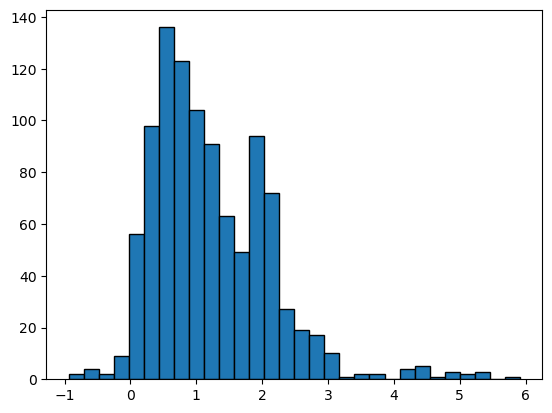

In [129]:
plt.hist(y_test,bins=30,edgecolor='k')

(array([  2.,   4.,   0.,   4.,   3.,   4.,   9.,   8.,  16.,  33.,  47.,
         56.,  57.,  45.,  67.,  95., 104., 103.,  69.,  31.,  42.,  59.,
         61.,  55.,  17.,   6.,   0.,   1.,   0.,   2.]),
 array([-2.65952897, -2.5495605 , -2.43959203, -2.32962356, -2.21965509,
        -2.10968662, -1.99971814, -1.88974967, -1.7797812 , -1.66981273,
        -1.55984426, -1.44987579, -1.33990732, -1.22993885, -1.11997038,
        -1.01000191, -0.90003344, -0.79006497, -0.6800965 , -0.57012803,
        -0.46015955, -0.35019108, -0.24022261, -0.13025414, -0.02028567,
         0.0896828 ,  0.19965127,  0.30961974,  0.41958821,  0.52955668,
         0.63952515]),
 <BarContainer object of 30 artists>)

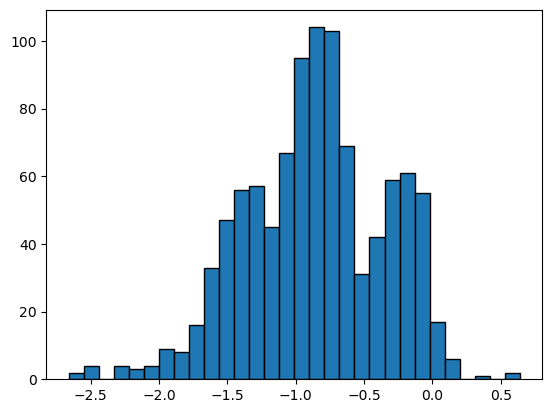

In [138]:
plt.hist(np.dot(x_test,est1_std_OLS.params),bins=30,edgecolor='k')

In [ ]:
colmns_tokeep=['quantity tons','country','application','thickness','width','product_ref','item_month',
               'delivery_month','status_Not lost for AM','status_Revised','status_To be approved',
               'status_Won','']

In [66]:
df_model2=df.loc[df['selling_price']>100].copy(deep=True)
df_model2=df_model2.drop('material_ref',axis=1)
df_model2=df_model2.dropna()

In [67]:
df_model2

id  quantity tons    customer  \
0       EC06F063-9DF0-440C-8764-0B0C05A4F6AE      54.151139  30156308.0   
2       E140FF1B-2407-4C02-A0DD-780A093B1158     386.127949  30153963.0   
3       F8D507A0-9C62-4EFE-831E-33E1DA53BB50     202.411065  30349574.0   
5       FE372230-29B1-4A29-BB73-CB9D3078C286     225.790676  30202938.0   
7       AA3F18A2-A7D6-43DE-8644-F0632AE2CB68     113.387124  30342192.0   
...                                      ...            ...         ...   
181667  0B812591-B501-4F34-859A-B06381FAEB44     106.783299  30200854.0   
181668  DE633116-D1DF-4846-982E-55EFC3658A76     102.482422  30200854.0   
181669  A48374B1-E6DB-45F2-889A-1F9C27C099EB     208.086469  30200854.0   
181670  91643238-5C7B-4237-9A5F-63AE3D35F320       4.235594  30200854.0   
181672  AD0CA853-AE3C-4B2F-9FBB-8B0B965F84BC     406.686538  30200854.0   

        country status item type  application  thickness   width  product_ref  \
0          28.0    Won         W         10.0       2.00  1500.0   1670798778   
2          30.0    Won        WI         28.0       0.38   952.0       628377   
3          32.0    Won         S         59.0       2.30  1317.0   1668701718   
5          25.0    Won         W         41.0       1.50  1265.0   1668701718   
7          32.0    Won         W         41.0       0.68  1220.0       611993   
...         ...    ...       ...          ...        ...     ...          ...   
181667     25.0    Won         W         41.0       0.96  1240.0    164141591   
181668     25.0    Won         W         41.0       0.96  1220.0    164141591   
181669     25.0    Won         W         41.0       0.95  1500.0    164141591   
181670     25.0    Won         W         41.0       0.71  1250.0    164141591   
181672     25.0    Won         W         41.0       0.71  1240.0    164141591   

        selling_price  item_month  delivery_month  
0              854.00         4.0             7.0  
2              644.33         4.0             1.0  
3              768.00         4.0             1.0  
5              983.00         4.0             4.0  
7              931.00         4.0             1.0  
...               ...         ...             ...  
181667         602.00         7.0             7.0  
181668         591.00         7.0             7.0  
181669         589.00         7.0             7.0  
181670         619.00         7.0             7.0  
181672         607.00         7.0             7.0  

[174083 rows x 13 columns]

In [68]:
cat_columns2=['status','item type']

In [69]:
df_model2 = pd.get_dummies(df_model2, columns = cat_columns2, drop_first=True)
df_model2 = df_model2.drop(['id','customer'], axis=1)
df_model2.head(7)

quantity tons  country  application  thickness   width  product_ref  \
0       54.151139     28.0         10.0       2.00  1500.0   1670798778   
2      386.127949     30.0         28.0       0.38   952.0       628377   
3      202.411065     32.0         59.0       2.30  1317.0   1668701718   
5      225.790676     25.0         41.0       1.50  1265.0   1668701718   
7      113.387124     32.0         41.0       0.68  1220.0       611993   
8       69.071853     38.0         10.0       0.60  1275.0   1668701376   
11     113.995666     32.0         41.0       0.55  1220.0       611993   

    selling_price  item_month  delivery_month  status_Not lost for AM  ...  \
0          854.00         4.0             7.0                       0  ...   
2          644.33         4.0             1.0                       0  ...   
3          768.00         4.0             1.0                       0  ...   
5          983.00         4.0             4.0                       0  ...   
7          931.00         4.0             1.0                       0  ...   
8         1363.00         4.0             7.0                       0  ...   
11         954.00         4.0             1.0                       0  ...   

    status_Revised  status_To be approved  status_Won  status_Wonderful  \
0                0                      0           1                 0   
2                0                      0           1                 0   
3                0                      0           1                 0   
5                0                      0           1                 0   
7                0                      0           1                 0   
8                0                      0           1                 0   
11               0                      0           1                 0   

    item type_Others  item type_PL  item type_S  item type_SLAWR  item type_W  \
0                  0             0            0                0            1   
2                  0             0            0                0            0   
3                  0             0            1                0            0   
5                  0             0            0                0            1   
7                  0             0            0                0            1   
8                  0             0            1                0            0   
11                 0             0            0                0            1   

    item type_WI  
0              0  
2              1  
3              0  
5              0  
7              0  
8              0  
11             0  

[7 rows x 22 columns]

In [70]:
for col in std_columns:
    df_model2[col]=(df_model2[col]-df_model2[col].mean())/df_model2[col].std()

In [71]:
df_model2

quantity tons   country  application  thickness     width  \
0           -0.049786 -0.691865    -0.870807       2.00  0.776564   
2            3.941665 -0.610053     0.144391       0.38 -1.307757   
3            1.732785 -0.528241     1.892788       2.30  0.080522   
5            2.013884 -0.814583     0.877590       1.50 -0.117260   
7            0.662425 -0.528241     0.877590       0.68 -0.288418   
...               ...       ...          ...        ...       ...   
181667       0.583025 -0.814583     0.877590       0.96 -0.212348   
181668       0.531314 -0.814583     0.877590       0.96 -0.288418   
181669       1.801022 -0.814583     0.877590       0.95  0.776564   
181670      -0.649935 -0.814583     0.877590       0.71 -0.174313   
181672       4.188846 -0.814583     0.877590       0.71 -0.212348   

        product_ref  selling_price  item_month  delivery_month  \
0          1.665798       0.107936   -0.692920        0.359822   
2         -0.660789      -0.933536   -0.692920       -1.387389   
3          1.662877      -0.319243   -0.692920       -1.387389   
5          1.662877       0.748704   -0.692920       -0.513783   
7         -0.660812       0.490410   -0.692920       -1.387389   
...             ...            ...         ...             ...   
181667    -0.433011      -1.143798    0.066083        0.359822   
181668    -0.433011      -1.198437    0.066083        0.359822   
181669    -0.433011      -1.208371    0.066083        0.359822   
181670    -0.433011      -1.059355    0.066083        0.359822   
181672    -0.433011      -1.118962    0.066083        0.359822   

        status_Not lost for AM  ...  status_Revised  status_To be approved  \
0                            0  ...               0                      0   
2                            0  ...               0                      0   
3                            0  ...               0                      0   
5                            0  ...               0                      0   
7                            0  ...               0                      0   
...                        ...  ...             ...                    ...   
181667                       0  ...               0                      0   
181668                       0  ...               0                      0   
181669                       0  ...               0                      0   
181670                       0  ...               0                      0   
181672                       0  ...               0                      0   

        status_Won  status_Wonderful  item type_Others  item type_PL  \
0                1                 0                 0             0   
2                1                 0                 0             0   
3                1                 0                 0             0   
5                1                 0                 0             0   
7                1                 0                 0             0   
...            ...               ...               ...           ...   
181667           1                 0                 0             0   
181668           1                 0                 0             0   
181669           1                 0                 0             0   
181670           1                 0                 0             0   
181672           1                 0                 0             0   

        item type_S  item type_SLAWR  item type_W  item type_WI  
0                 0                0            1             0  
2                 0                0            0             1  
3                 1                0            0             0  
5                 0                0            1             0  
7                 0                0            1             0  
...             ...              ...          ...           ...  
181667            0                0            1             0  
181668            0                0            1       

In [102]:
df_train2=df_model2.iloc[110000:172681]
df_test2=df_model2.iloc[:2000]

x_train2=df_train2.loc[:,df_train2.columns != 'selling_price']
y_train2=df_train2['selling_price']
x_test2=df_test2.loc[:,df_test2.columns != 'selling_price']
y_test2=df_test2['selling_price']

In [105]:
y_test2.shape

(2000,)

In [103]:
x_test2.shape

(2000, 21)

In [98]:
model_train_std2= sm.add_constant(x_train2)
est3_std_OLS = sm.OLS(y_train2, model_train_std2)
est2_std_OLS = est3_std_OLS.fit()
print(est2_std_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     1768.
Date:                Sun, 19 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:02:12   Log-Likelihood:                -64015.
No. Observations:               62681   AIC:                         1.281e+05
Df Residuals:                   62663   BIC:                         1.282e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

(array([  3.,   0.,   4.,   4.,   7.,   4.,   8.,  13.,  13.,  17.,  19.,
         37.,  61.,  62.,  84.,  74., 128., 134., 124., 137., 145., 146.,
        120., 138., 260., 166.,  70.,  11.,   4.,   7.]),
 array([-2.99101556, -2.91585372, -2.84069189, -2.76553005, -2.69036822,
        -2.61520638, -2.54004454, -2.46488271, -2.38972087, -2.31455903,
        -2.2393972 , -2.16423536, -2.08907353, -2.01391169, -1.93874985,
        -1.86358802, -1.78842618, -1.71326435, -1.63810251, -1.56294067,
        -1.48777884, -1.412617  , -1.33745516, -1.26229333, -1.18713149,
        -1.11196966, -1.03680782, -0.96164598, -0.88648415, -0.81132231,
        -0.73616048]),
 <BarContainer object of 30 artists>)

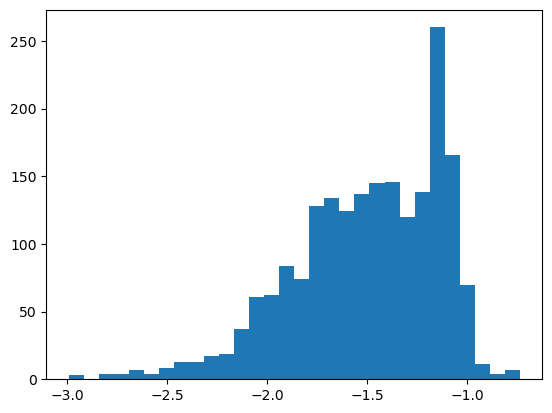

In [119]:
plt.hist(np.dot(sm.add_constant(x_test2),est2_std_OLS.params),bins=30)

In [113]:
np.dot(x_test2,est2_std_OLS.params)

ValueError: shapes (2000,21) and (22,) not aligned: 21 (dim 1) != 22 (dim 0)

In [116]:
est2_std_OLS.params.shape

(22,)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,
          3.,   4.,  22., 102., 102., 108., 187., 249., 232., 216., 224.,
        247., 124.,  84.,  28.,  10.,   4.,   8.,   5.,   3.,   9.,  10.,
          3.,   2.,   6.,   2.,   1.,   0.,   2.]),
 array([-2.00143262, -1.76273202, -1.52403143, -1.28533083, -1.04663024,
        -0.80792964, -0.56922905, -0.33052845, -0.09182786,  0.14687274,
         0.38557333,  0.62427392,  0.86297452,  1.10167511,  1.34037571,
         1.5790763 ,  1.8177769 ,  2.05647749,  2.29517809,  2.53387868,
         2.77257928,  3.01127987,  3.24998047,  3.48868106,  3.72738166,
         3.96608225,  4.20478285,  4.44348344,  4.68218404,  4.92088463,
         5.15958523,  5.39828582,  5.63698641,  5.87568701,  6.1143876 ,
         6.3530882 ,  6.59178879,  6.83048939,  7.06918998,  7.30789058,
         7.54659117]),
 <BarContainer object of 40 artists>)

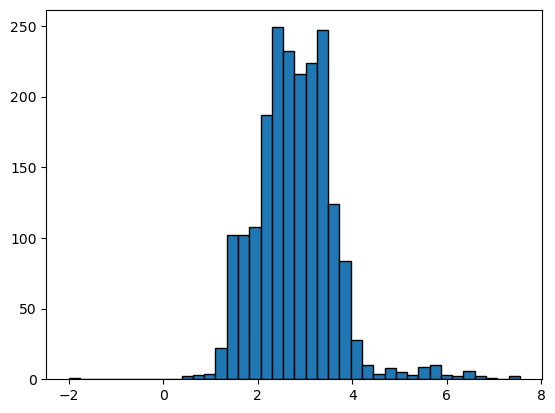

In [121]:
plt.hist(y_test2-np.dot(sm.add_constant(x_test2),est2_std_OLS.params),bins=40,edgecolor='k')

In [86]:
y_test2.std()

0.8201911746134493

# Observations
- We first converted the categorical variables into numercal variables by one-hot-encoding.
- We already saw from the correlation plots that none of the variables have a high correlation with the output variable. But from the graph of `sale_price` for differnt categories of `material_ref`, we already saw different material has different sale value. So we could expect it to be an important parameter for predicting sale price.
- While building the model, two variations of Linear Regression was used, one with all the parameters (except `id` and `customer`), and one with all except `material_ref`.
- $R^2$ value for 1st model as seen from the OLS report is ~$0.65$ and for the second model is ~$0.30$.
- The $F-$Statistic of model-1 and model-3 has values $340.9$ and $5.1$ respectively. Using the formula $F=\frac{RSS_N-RSS_E}{RSS_E}\frac{n-p-s-1}{s}$ we find the under the null hypothesis ($H_0$) that the variable `material_ref` coefficient ~0, we find the p-value ~$0$. This confirms that we have to include `material_ref` variable to have a good predictive model.
- Thus from the analysis we find that model-1 performs better for prediction purposed. But at the same time it has drawbacks too, since there are many different categories of `material_ref`, one-hot-encoding leads to formation of a lot of columns (~1600). This makes the model very large, and it takes a long time to train the model.
- Since it was so computationally heavy, my computer couldn't handle computing all the training data, therefore I had to train the model using a fraction of the sample data.